In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [2]:
# Leer datos de terrazas del portal de datos abiertos de Madrid
# (versión descargada el 20211011)

terr = pd.read_csv("200085-19-censo-locales.csv",delimiter = ';', encoding='iso-8859-1') 

In [4]:
# Mesas y sillas por distrito
terr_distr = terr.\
    groupby('desc_distrito_local')[['mesas_es']].sum().reset_index()

,desc_distrito_local,mesas_es,sillas_es
0,ARGANZUELA,4086,13776
1,BARAJAS,815,2897
2,CARABANCHEL,2962,9832
3,CENTRO,5925,19722
4,CHAMARTIN,5614,17927
5,CHAMBERI,5823,18426
6,CIUDAD LINEAL,2261,7151
7,FUENCARRAL-EL PARDO,3859,12677
8,HORTALEZA,2222,7544
9,LATINA,3075,10741


In [5]:
# Leer datos de padron municipal

pobl = pd.read_csv("200076-1-padron.csv",delimiter = ';', encoding='iso-8859-1') 
pobl = pobl.fillna(0)

In [6]:
# total de poblacion entre hombres y mujeres, españoles y extranjeros

pobl['total_hab']= pobl['EspanolesHombres']+pobl['EspanolesMujeres']+\
    pobl['ExtranjerosHombres']+pobl['ExtranjerosMujeres']

# Población por distrito
pobl_distr = pobl.\
    groupby('DESC_DISTRITO')['total_hab'].sum().reset_index()

,DESC_DISTRITO,total_hab
0,ARGANZUELA,153886.0
1,BARAJAS,50260.0
2,CARABANCHEL,257369.0
3,CENTRO,141615.0
4,CHAMARTIN,145013.0
5,CHAMBERI,137891.0
6,CIUDAD LINEAL,215572.0
7,FUENCARRAL-EL PARDO,247294.0
8,HORTALEZA,193909.0
9,LATINA,238857.0


In [7]:
# Unimos las tablas de terrazas y de población

terr_pobl = pd.merge(terr_distr, pobl_distr,\
                     left_on=['desc_distrito_local'], right_on = ['DESC_DISTRITO'])

,desc_distrito_local,mesas_es,sillas_es,DESC_DISTRITO,total_hab
0,ARGANZUELA,4086,13776,ARGANZUELA,153886.0
1,BARAJAS,815,2897,BARAJAS,50260.0
2,CARABANCHEL,2962,9832,CARABANCHEL,257369.0
3,CENTRO,5925,19722,CENTRO,141615.0
4,CHAMARTIN,5614,17927,CHAMARTIN,145013.0
5,CHAMBERI,5823,18426,CHAMBERI,137891.0
6,CIUDAD LINEAL,2261,7151,CIUDAD LINEAL,215572.0
7,FUENCARRAL-EL PARDO,3859,12677,FUENCARRAL-EL PARDO,247294.0
8,HORTALEZA,2222,7544,HORTALEZA,193909.0
9,LATINA,3075,10741,LATINA,238857.0


In [8]:
# Calculamos las mesas por cada 1000 habitantes
terr_pobl['mesas_hab']= terr_pobl['mesas_es']/terr_pobl['total_hab']*1000
terr_pobl = terr_pobl.round(decimals=0)
terr_pobl.sort_values(by=['mesas_hab'], inplace= True, ascending = False,ignore_index=True)

In [9]:
# Media de mesas por 1000 habitantes
terr_pobl['mesas_es'].sum()/terr_pobl['total_hab'].sum() * 1000

19.283369016944498

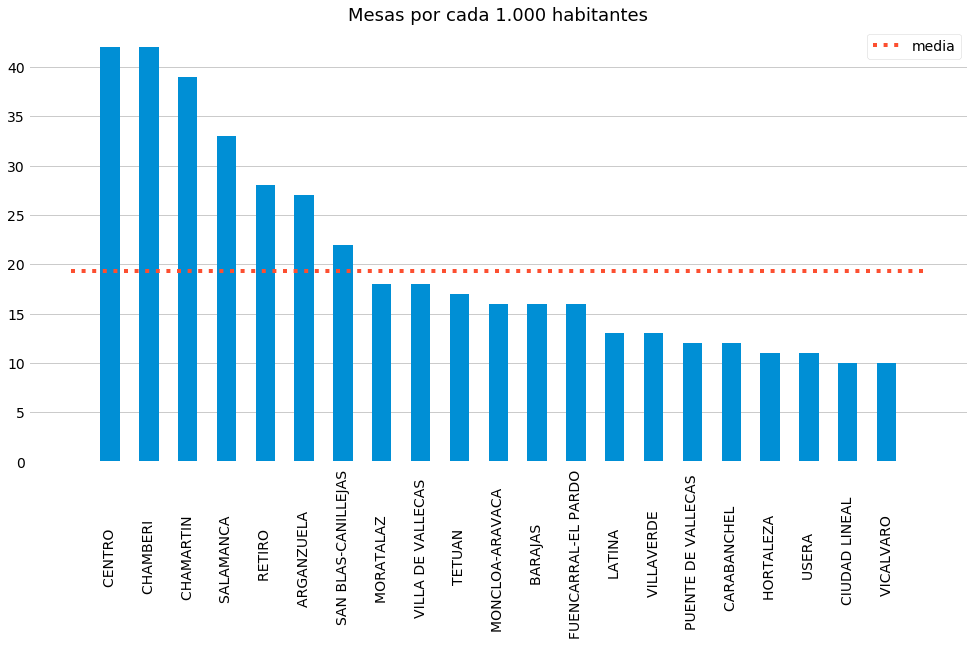

In [10]:
# dibujar mesas por 1000 habitantes por distrito 

x = terr_pobl['desc_distrito_local']
y = terr_pobl['mesas_hab']
media = terr_pobl['mesas_es'].sum()/terr_pobl['total_hab'].sum() * 1000

plt.bar(x, y, alpha=1, color=sns.color_palette()[0],width=0.5)
plt.hlines(y=media, xmin=-1, xmax = 21, ls='dotted', label = 'media', color=sns.color_palette()[1])

plt.xticks(x,rotation = 90)
plt.grid(axis='y')
plt.legend()
plt.title('Mesas por cada 1.000 habitantes',fontsize= 18)
#plt.savefig('images/ingresos_plaza_distrito.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [11]:
# Leer datos históricos de terrazas del portal de datos abiertos de Madrid 
# datos de febrero 2020(versión descargada el 20211018)

terr2 = pd.read_csv("209548-214-censo-locales-historico.csv",delimiter = ';', encoding='iso-8859-1') 


In [13]:
# Mesas y sillas por distrito
terr_distr2 = terr2.\
    groupby('desc_distrito_local')[['mesas_es']].sum().reset_index()

,desc_distrito_local,mesas_es,sillas_es
0,ARGANZUELA,3709,12376
1,BARAJAS,716,2560
2,CARABANCHEL,2541,8543
3,CENTRO,5405,18208
4,CHAMARTIN,4802,15425
5,CHAMBERI,4655,14539
6,CIUDAD LINEAL,2050,6535
7,FUENCARRAL-EL PARDO,3467,11479
8,HORTALEZA,1953,6811
9,LATINA,2870,10008


In [14]:
# Unimos las tablas de terrazas y de población

terr_pobl2 = pd.merge(terr_distr2, pobl_distr,\
                     left_on=['desc_distrito_local'], right_on = ['DESC_DISTRITO'])

,desc_distrito_local,mesas_es,sillas_es,DESC_DISTRITO,total_hab
0,ARGANZUELA,3709,12376,ARGANZUELA,153886.0
1,BARAJAS,716,2560,BARAJAS,50260.0
2,CARABANCHEL,2541,8543,CARABANCHEL,257369.0
3,CENTRO,5405,18208,CENTRO,141615.0
4,CHAMARTIN,4802,15425,CHAMARTIN,145013.0
5,CHAMBERI,4655,14539,CHAMBERI,137891.0
6,CIUDAD LINEAL,2050,6535,CIUDAD LINEAL,215572.0
7,FUENCARRAL-EL PARDO,3467,11479,FUENCARRAL-EL PARDO,247294.0
8,HORTALEZA,1953,6811,HORTALEZA,193909.0
9,LATINA,2870,10008,LATINA,238857.0


In [15]:
# Calculamos las mesas por cada 1000 habitantes
terr_pobl2['mesas_hab']= terr_pobl2['mesas_es']/terr_pobl2['total_hab']*1000
terr_pobl2 = terr_pobl2.round(decimals=0)
terr_pobl2.sort_values(by=['mesas_hab'], inplace= True, ascending = False,ignore_index=True)

In [16]:
# Media de mesas por 1000 habitantes
terr_pobl2['mesas_es'].sum()/terr_pobl2['total_hab'].sum() * 1000

16.65255356398953

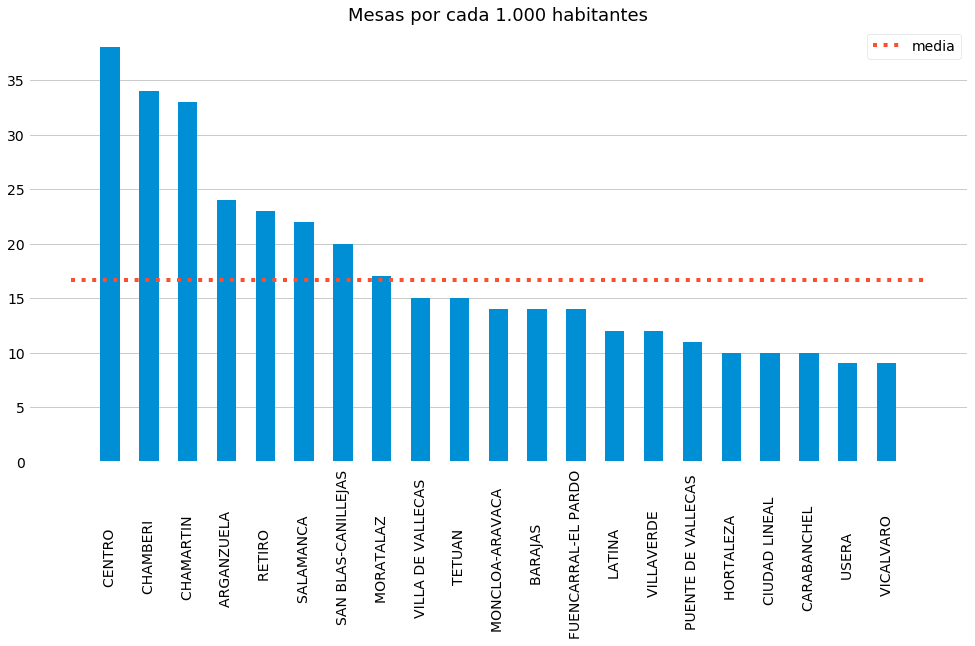

In [17]:
# dibujar mesas por 1000 habitantes por distrito 

x = terr_pobl2['desc_distrito_local']
y = terr_pobl2['mesas_hab']
media = terr_pobl2['mesas_es'].sum()/terr_pobl2['total_hab'].sum() * 1000

plt.bar(x, y, alpha=1, color=sns.color_palette()[0],width=0.5)
plt.hlines(y=media, xmin=-1, xmax = 21, ls='dotted', label = 'media', color=sns.color_palette()[1])

plt.xticks(x,rotation = 90)
plt.grid(axis='y')
plt.legend()
plt.title('Mesas por cada 1.000 habitantes',fontsize= 18)
#plt.savefig('images/ingresos_plaza_distrito.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [48]:
# Crecimiento en el nº de mesas
crec = terr_pobl['mesas_hab']/terr_pobl2['mesas_hab']-1
crec = crec.round(2)*100

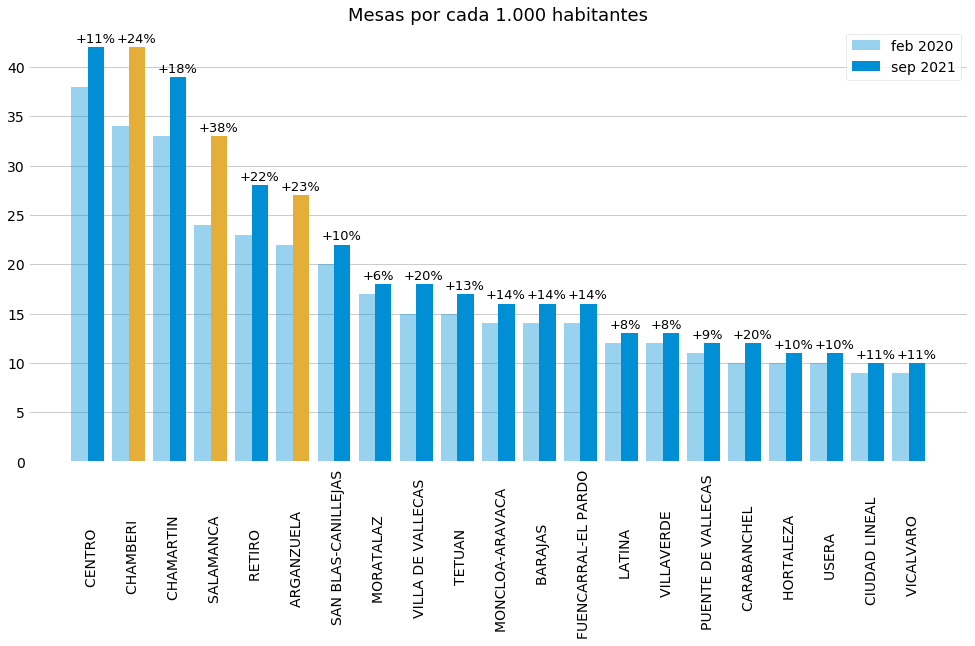

In [71]:
# dibujar comparación sep'21 con feb'2'de mesas por 1000 habitantes por distrito 

x = np.arange(terr_pobl['desc_distrito_local'].nunique())
y1 = terr_pobl['mesas_hab']
y2 = terr_pobl2['mesas_hab']

#media1 = terr_pobl['mesas_es'].sum()/terr_pobl['total_hab'].sum() * 1000
#media2 = terr_pobl2['mesas_es'].sum()/terr_pobl2['total_hab'].sum() * 1000

#plt.hlines(y=media2, xmin=-1, xmax = 21, ls='dotted', alpha=0.5,
#           label = 'media feb 2020', color=sns.color_palette()[0])
#plt.hlines(y=media1, xmin=-1, xmax = 21, ls='dotted', alpha=0.5,
#           label = 'media sep 2021', color=sns.color_palette()[2])

plt.bar(x, y2, alpha=0.4, color=sns.color_palette()[0],
        width=0.4, 
        label='feb 2020')
plt.bar(x+0.4, y1, alpha=1, color=sns.color_palette()[0],
        width=0.4, label='sep 2021')

# Seleccionamos los tres distritos en los que más han crecido las mesas
y3 = np.zeros(x.size, dtype=int)
y3[1] = y1[1]
y3[3] = y1[3]
y3[5] = y1[5]
plt.bar(x+0.4, y3, alpha=1, color=sns.color_palette()[2],width=0.4)

for i, v in enumerate(y1):
    plt.text(x[i]-0.1, v + 0.5, f'+{crec.to_numpy()[i]:.0f}%', size=13)

plt.xticks(x+0.3,terr_pobl['desc_distrito_local'],rotation = 90)
plt.grid(axis='y')
plt.legend()
plt.title('Mesas por cada 1.000 habitantes',fontsize= 18)
plt.savefig('images/mesas_1000habs.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()